In [ ]:
!pip install pandas_datareader
import pandas_datareader as pdr

In [ ]:
!pip install mplfinance
import mplfinance as mpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.1 MB/s eta 0:00:00


In [ ]:
import math
import pickle
import requests
import bs4 as bs
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
start = dt.datetime(2022, 1, 1)
end = dt.datetime.now()
data = yf.download('AAPL', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724564,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443573,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723587,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840256,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008118,86709100


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,619.000000,619.000000,619.000000,619.000000,619.000000,6.190000e+02
mean,167.184265,169.004863,165.526527,167.331858,166.448971,7.168846e+07
std,18.339072,18.121767,18.519385,18.317347,18.627043,2.581068e+07
min,126.010002,127.769997,124.169998,125.019997,124.166641,2.404830e+07
25%,152.139999,154.074997,150.165001,151.989998,150.839073,5.242500e+07
50%,169.690002,171.250000,168.270004,169.649994,169.000000,6.708340e+07
75%,181.270004,182.759995,179.254997,181.139999,180.700592,8.464505e+07
max,217.589996,220.199997,213.000000,216.669998,216.669998,1.981343e+08


In [ ]:
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,86709100


In [ ]:
data.index.name = 'Date'
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,86709100


In [ ]:
data[-1:]['Close'][0]

209.67999267578125

**Financial Analysis**: Candlestick charts are crucial in technical analysis for visualizing price movements and identifying potential market trends.<br>
**Data Manipulation**: Using pandas makes it easy to manipulate and prepare data for analysis.<br>
**Real-time Data**: yfinance provides a straightforward way to fetch up-to-date stock market data.<br>
**Visualization**: mplfinance allows for sophisticated and informative visualizations, making it easier to interpret financial data.<br>

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


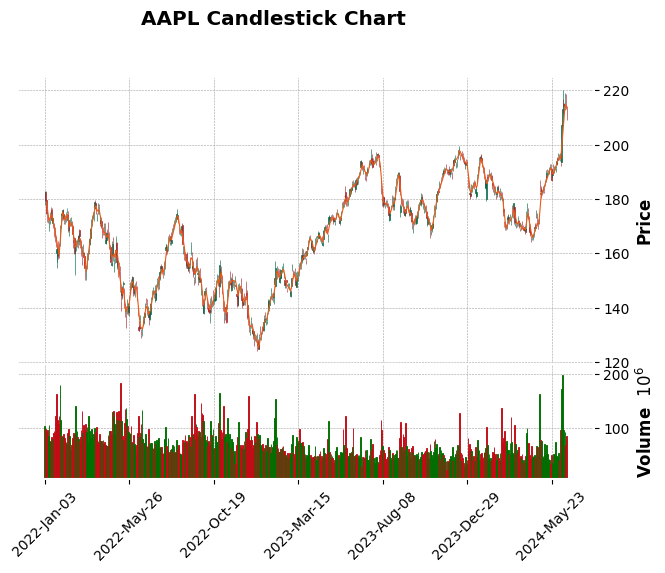

In [ ]:
mpf.plot(data, type='candle', style='charles', volume=True, title='AAPL Candlestick Chart', mav=(3))


In [ ]:
tickers = ['AAPL', 'TSLA','NVDA','AMZN', 'GOOG']
amounts = [7,5,16,2,4]
prices = []
total = []

for ticker in tickers:
  start = dt.datetime(2022, 1, 1)
  end = dt.datetime.now()
  data = yf.download(ticker, start = start, end = end)
  data = data[['Open', 'High', 'Low', 'Close', 'Volume']]
  price = data[-1:]['Close'][0]
  prices.append(price)
  index = tickers.index(ticker)
  total.append(price * amounts[index])
print('')
print(prices)
print(total)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[209.67999267578125, 181.57000732421875, 130.77999877929688, 186.10000610351562, 177.7100067138672]
[1467.7599487304688, 907.8500366210938, 2092.47998046875, 372.20001220703125, 710.8400268554688]


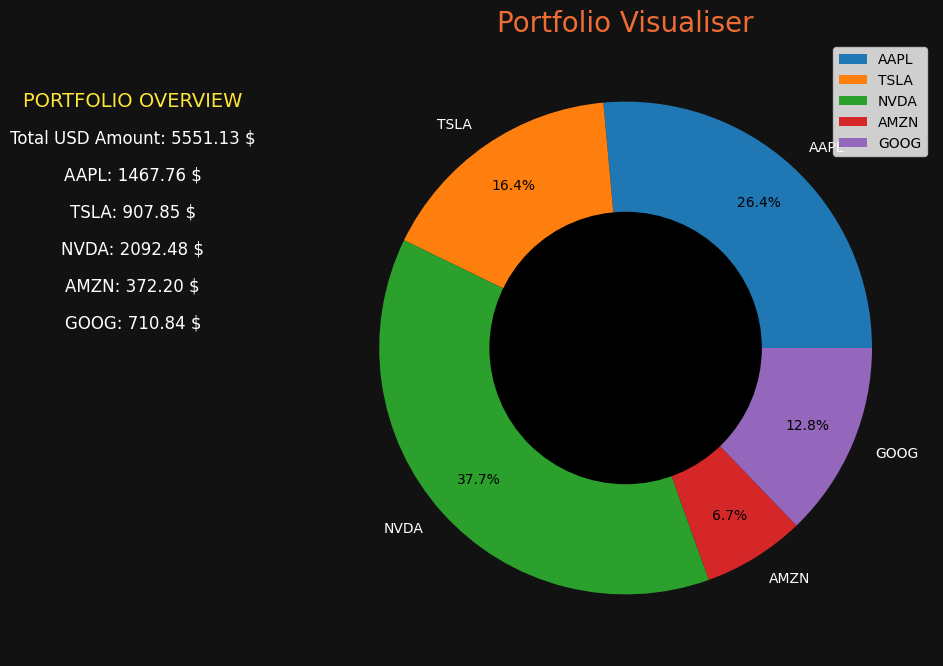

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))

ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

_, texts, _ = ax.pie(total, labels = tickers, autopct = "%1.1f%%", pctdistance = 0.8)
[text.set_color('white') for text in texts]
my_circle = plt.Circle((0,0), 0.55, color  = 'black')
plt.gca().add_artist(my_circle)
ax.set_title('Portfolio Visualiser', color = '#EF6C35' , fontsize = 20)
plt.legend(loc = 'upper right')

ax.text(-2, 1, 'PORTFOLIO OVERVIEW', fontsize = 14, color = '#FFE536', verticalalignment = 'center', horizontalalignment = 'center')
ax.text(-2,0.85, f'Total USD Amount: {sum(total):.2f} $', fontsize = 12, color = 'white', verticalalignment = 'center', horizontalalignment = 'center')
counter = 0.15
for ticker in tickers:
  ax.text(-2,0.85 - counter, f'{ticker}: {total[tickers.index(ticker)]:.2f} $', fontsize = 12, color = 'white', verticalalignment = 'center', horizontalalignment = 'center')
  counter += 0.15
plt.show()

## S&P 500 Web scrapping
The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of 500 of the largest companies listed on stock exchanges in the United States

In [ ]:
html = requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
print(html.text)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>List of S&amp;P 500 companies - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled v

In [ ]:
# Parses the HTML content using BeautifulSoup and creates a BeautifulSoup object for easy navigation and extraction of data.
soup  = bs.BeautifulSoup(html.text , 'html.parser')
tickers = []
table = soup.find('table', {'class': 'wikitable sortable'})
rows = table.findAll('tr')[1:]     # find all the rows except the header row
for row in rows:
  ticker = row.findAll('td')[0].text   # find all the row's first cell
  tickers.append(ticker[:-1])   # strip the whitespaces
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

In [ ]:
#Opens a file named snp500.pickle in write-binary mode.
#Uses pickle.dump to serialize the tickers list and save it to the file.
with open('snp500.pickle', 'wb') as f:
  pickle.dump(tickers, f)

In [ ]:
# To read the binary file
with open('snp500.pickle', 'rb') as f:
  tickers = pickle.load(f)
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADBE', 'AMD', 'AES', 'AFL', 'A', 'APD', 'ABNB', 'AKAM', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BK', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'BLDR', 'BG', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC', 'CNP', 'CF', 'CHRW', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CPAY', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'C

In [ ]:
ticker = 'AAPL'
start = dt.datetime(2023,1,1)
end = dt.datetime.now()
data = yf.download(ticker, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216293,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166649,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800


RSI is a momentum oscillator that measures the speed and change of price movements and is often used to identify overbought or oversold conditions in a trading asset.

Relative Strength Index (RSI) for a stock's adjusted closing prices over a specified period (14 days).

In [ ]:
delta = data['Adj Close'].diff(1)
delta.dropna(inplace = True)
positive = delta.copy()
negative = delta.copy()
positive[positive < 0] = 0
negative[negative > 0] = 0

days = 14
average_gain = positive.rolling(window = days).mean()
average_loss = abs(negative.rolling(window= days).mean())
relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0 / (1.0+ relative_strength))
combined = pd.DataFrame()
combined['Adj Close'] = data['Adj Close']
combined['RSI'] = RSI

**RSI Calculation**: RSI values range from 0 to 100. Traditionally, RSI values above 70 indicate overbought conditions, and values below 30 indicate oversold conditions.<br>
**Rolling Mean**: Using the rolling mean smooths out the gains and losses over the specified period, which helps in identifying the trend.

A rolling mean, also known as a moving average, is a statistical technique used to smooth out time series data by creating a series of averages of different subsets of the full data set. It is widely used in time series analysis, stock price analysis, and signal processing to identify trends and patterns by reducing noise and fluctuations in the data.

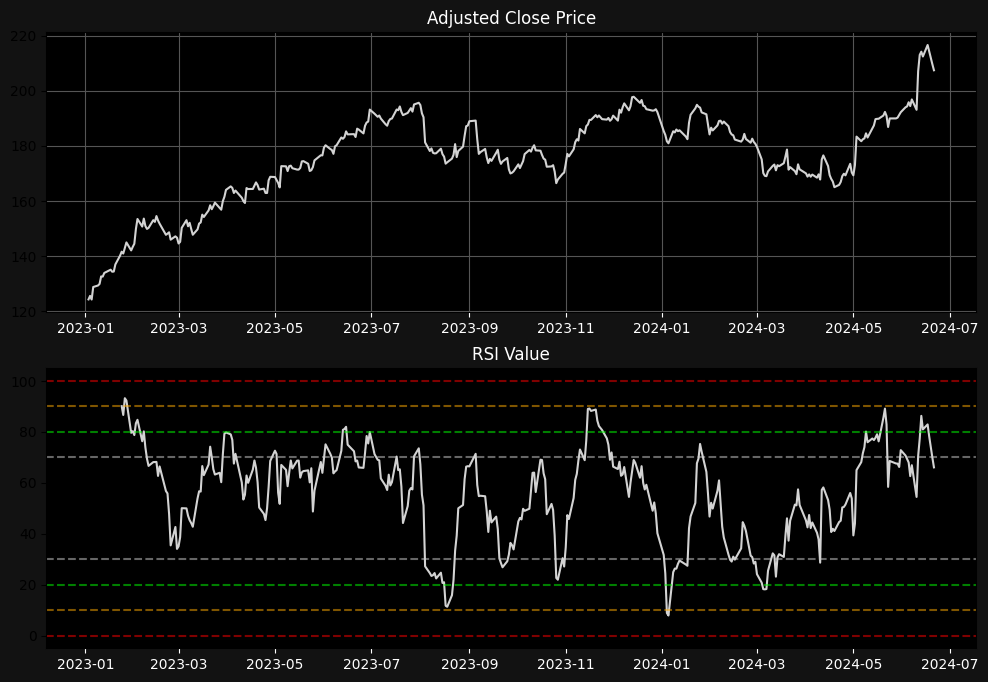

In [ ]:
plt.figure(figsize = (12,8))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color = 'lightgray')
ax1.set_title('Adjusted Close Price', color = 'white')
ax1.grid(True, color = '#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis = 'x', colors = 'white')
ax1.tick_params(axis = 'x', colors = 'white')

ax2 = plt.subplot(212, sharex = ax1)
ax2.plot(combined.index, combined['RSI'], color = 'lightgray')
ax2.axhline(0, linestyle = '--', alpha = 0.5, color = '#ff0000')
ax2.axhline(10, linestyle = '--', alpha = 0.5, color = '#ffaa00')
ax2.axhline(20, linestyle = '--', alpha = 0.5, color = '#00ff00')
ax2.axhline(30, linestyle = '--', alpha = 0.5, color = '#cccccc')
ax2.axhline(70, linestyle = '--', alpha = 0.5, color = '#cccccc')
ax2.axhline(80, linestyle = '--', alpha = 0.5, color = '#00ff00')
ax2.axhline(90, linestyle = '--', alpha = 0.5, color = '#ffaa00')
ax2.axhline(100, linestyle = '--', alpha = 0.5, color = '#ff0000')

ax2.set_title('RSI Value', color = 'white')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis = 'x', colors = 'white')
ax2.tick_params(axis = 'x', colors = 'white')

##Predicting Stock Prices

In [ ]:
# Tiingo API key
api_key = 'b697b69771de5c301b9c81e50d20ee3ca5abac16'
ticker = 'AAPL'

# Headers for the API request
headers = {
    'Content-Type': 'application/json'
}

# Base URL for the Tiingo API
base_url = "https://api.tiingo.com/tiingo/daily/{}/prices"

start_date = "2022-01-01"
end_date = dt.datetime.now().strftime("%Y-%m-%d")

# Construct the full URL for the API request
request_url = base_url.format(ticker) + f"?token={api_key}&startDate={start_date}&endDate={end_date}"

# Send the GET request
response = requests.get(request_url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()

    # Convert the JSON data to a DataFrame
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file
    df.to_csv(f'{ticker}.csv', index=False)

    print(f"Data for {ticker} saved successfully.")
else:
    print(f"Failed to fetch data for {ticker}. Status code: {response.status_code}")

print("Data fetching completed.")


Data for AAPL saved successfully.
Data fetching completed.


In [ ]:
df = pd.read_csv('AAPL.csv', encoding='Latin-1')
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2022-01-03T00:00:00.000Z,182.01,182.88,177.71,177.83,104701220,179.485059,180.342990,175.244711,175.363047,104701220,0.0,1.0
1,2022-01-04T00:00:00.000Z,179.70,182.94,179.12,182.63,99310438,177.207105,180.402158,176.635151,180.096458,99310438,0.0,1.0
2,2022-01-05T00:00:00.000Z,174.92,180.17,174.64,179.61,94537602,172.493416,177.670585,172.217300,177.118354,94537602,0.0,1.0
3,2022-01-06T00:00:00.000Z,172.00,175.30,171.64,172.70,96903955,169.613924,172.868144,169.258918,170.304213,96903955,0.0,1.0
4,2022-01-07T00:00:00.000Z,172.17,174.14,171.03,172.89,86709147,169.781565,171.724236,168.657380,170.491577,86709147,0.0,1.0


Long Short Term Memory, also known as LSTMs, are a special kind of Recurrent Neural Network, or RNN, architecture capable of learning long-term dependencies as well as a solution to the vanishing gradient problem that can occur when training traditional RNNs.

In [ ]:
df1 = df['close']
df1.head()

0    182.01
1    179.70
2    174.92
3    172.00
4    172.17
Name: close, dtype: float64

In [ ]:
df1.shape

(623,)

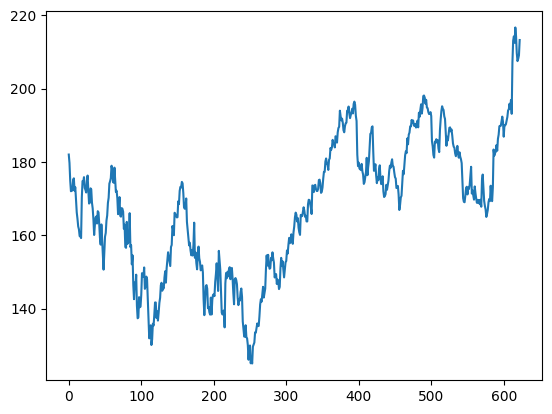

In [ ]:
plt.plot(df1)

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[6.21822149e-01],
       [5.96617567e-01],
       [5.44462630e-01],
       [5.12602291e-01],
       [5.14457174e-01],
       [5.14675396e-01],
       [5.46208402e-01],
       [5.51118385e-01],
       [5.14675396e-01],
       [5.24277141e-01],
       [4.88597927e-01],
       [4.49645390e-01],
       [4.30878342e-01],
       [4.07965085e-01],
       [3.99345336e-01],
       [3.79268958e-01],
       [3.78286961e-01],
       [3.73158756e-01],
       [4.94380797e-01],
       [5.42935079e-01],
       [5.41080196e-01],
       [5.54500818e-01],
       [5.22422259e-01],
       [5.16857610e-01],
       [5.08892526e-01],
       [5.43480633e-01],
       [5.59301691e-01],
       [5.13911620e-01],
       [4.75941080e-01],
       [4.78559738e-01],
       [5.21222040e-01],
       [5.18603382e-01],
       [4.78559738e-01],
       [4.61320240e-01],
       [4.28805237e-01],
       [3.82433170e-01],
       [4.11565739e-01],
       [4.34588107e-01],
       [4.37534097e-01],
       [4.16584834e-01],


In [ ]:
df1.shape

(623, 1)

In [ ]:
training_size = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [ ]:
train_data

array([[6.21822149e-01],
       [5.96617567e-01],
       [5.44462630e-01],
       [5.12602291e-01],
       [5.14457174e-01],
       [5.14675396e-01],
       [5.46208402e-01],
       [5.51118385e-01],
       [5.14675396e-01],
       [5.24277141e-01],
       [4.88597927e-01],
       [4.49645390e-01],
       [4.30878342e-01],
       [4.07965085e-01],
       [3.99345336e-01],
       [3.79268958e-01],
       [3.78286961e-01],
       [3.73158756e-01],
       [4.94380797e-01],
       [5.42935079e-01],
       [5.41080196e-01],
       [5.54500818e-01],
       [5.22422259e-01],
       [5.16857610e-01],
       [5.08892526e-01],
       [5.43480633e-01],
       [5.59301691e-01],
       [5.13911620e-01],
       [4.75941080e-01],
       [4.78559738e-01],
       [5.21222040e-01],
       [5.18603382e-01],
       [4.78559738e-01],
       [4.61320240e-01],
       [4.28805237e-01],
       [3.82433170e-01],
       [4.11565739e-01],
       [4.34588107e-01],
       [4.37534097e-01],
       [4.16584834e-01],


In [ ]:
training_size, test_size

(404, 219)

In [ ]:
def create_dataset(dataset, time_step  = 1):
  dataX, dataY = [], []
  for i in range(len(dataset)- time_step - 1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train

array([[0.62182215, 0.59661757, 0.54446263, ..., 0.19738134, 0.16737589,
        0.16912166],
       [0.59661757, 0.54446263, 0.51260229, ..., 0.16737589, 0.16912166,
        0.20469176],
       [0.54446263, 0.51260229, 0.51445717, ..., 0.16912166, 0.20469176,
        0.26863066],
       ...,
       [0.30518276, 0.33638843, 0.32711402, ..., 0.72176759, 0.62160393,
        0.58734315],
       [0.33638843, 0.32711402, 0.3533006 , ..., 0.62160393, 0.58734315,
        0.59770867],
       [0.32711402, 0.3533006 , 0.37381342, ..., 0.58734315, 0.59770867,
        0.58014184]])

In [ ]:
y_train

array([2.04691762e-01, 2.68630660e-01, 2.59901800e-01, 2.58483361e-01,
       2.85761047e-01, 2.22149482e-01, 2.30441899e-01, 2.58483361e-01,
       2.50300055e-01, 1.92253137e-01, 1.32133115e-01, 7.48499727e-02,
       8.44517185e-02, 1.13584288e-01, 5.49918167e-02, 7.13584288e-02,
       1.18385161e-01, 1.12711402e-01, 1.44571740e-01, 1.81560284e-01,
       1.81560284e-01, 1.35515548e-01, 1.55046372e-01, 1.27659574e-01,
       1.51773050e-01, 1.80469176e-01, 1.95308238e-01, 2.32733224e-01,
       2.40261866e-01, 2.16584834e-01, 2.27386798e-01, 2.23349700e-01,
       2.55864703e-01, 2.74413530e-01, 2.40589198e-01, 2.83469722e-01,
       3.05728314e-01, 3.30932897e-01, 3.17184943e-01, 3.04746318e-01,
       2.90016367e-01, 3.46644845e-01, 3.52755046e-01, 4.09056192e-01,
       3.98145117e-01, 3.81778505e-01, 4.48554283e-01, 4.45062739e-01,
       4.40043644e-01, 4.34806328e-01, 4.35351882e-01, 4.82487725e-01,
       4.74304419e-01, 5.13693399e-01, 5.25586470e-01, 5.23840698e-01,
      

In [ ]:
X_train.shape, y_train.shape

((303, 100), (303,))

In [ ]:
X_test.shape, y_test.shape

((118, 100), (118,))

**i/p** - (samples, time_steps, features)<br>
**samples**: The number of sequences (or samples) in your dataset.<br>
**time_steps**: The number of time steps in each sequence.<br>
**features**: The number of features at each time step.<br>
**X_train.shape[0]**: This is the number of samples in the training set.<br>
**X_train.shape[1]**: This is the number of time steps in each sequence.<br>
**1**: This represents the number of features at each time step. In this case, it’s 1 because the input is univariate (e.g., a single time series).


In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [ ]:
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model = Sequential()
#return_sequences=True means that the LSTM layer will return the full sequence of outputs for each input sequence, rather than just the output for the last time step.
#input_shape=(100, 1) specifies that the input to this layer is a sequence of 100 time steps, each with a single feature.
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


An epoch is one complete pass through the entire training dataset<br>
The number of samples per gradient update. Instead of updating the model parameters after each sample, updates are done after processing a batch of samples.<br>
**Training Loop**: The model will iterate over the entire training dataset (X_train, y_train) 100 times (as specified by epochs=100).<br>
**Batch Processing**: During each epoch, the training data is divided into batches of 64 samples. The model parameters (weights) are updated after processing each batch.

In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
5/5 [==============================] - 9s 492ms/step - loss: 0.1087 - val_loss: 0.0572
Epoch 2/100
5/5 [==============================] - 1s 174ms/step - loss: 0.0276 - val_loss: 0.0117
Epoch 3/100
5/5 [==============================] - 1s 177ms/step - loss: 0.0138 - val_loss: 0.0597
Epoch 4/100
5/5 [==============================] - 1s 173ms/step - loss: 0.0191 - val_loss: 0.0287
Epoch 5/100
5/5 [==============================] - 1s 173ms/step - loss: 0.0103 - val_loss: 0.0095
Epoch 6/100
5/5 [==============================] - 1s 174ms/step - loss: 0.0111 - val_loss: 0.0112
Epoch 7/100
5/5 [==============================] - 1s 178ms/step - loss: 0.0083 - val_loss: 0.0178
Epoch 8/100
5/5 [==============================] - 1s 175ms/step - loss: 0.0078 - val_loss: 0.0082
Epoch 9/100
5/5 [==============================] - 1s 183ms/step - loss: 0.0070 - val_loss: 0.0080
Epoch 10/100
5/5 [==============================] - 1s 249ms/step - loss: 0.0064 - val_loss: 0.0089
Epoch 11/

In [ ]:
# Evaluate the model on the training data
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

# Evaluate the model on the test data
testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.0021 MSE (0.0457 RMSE)
Test Score: 0.0028 MSE (0.0532 RMSE)


In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

4/4 [==============================] - 0s 32ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train, train_predict))

157.8494173564058

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

181.78945217018358

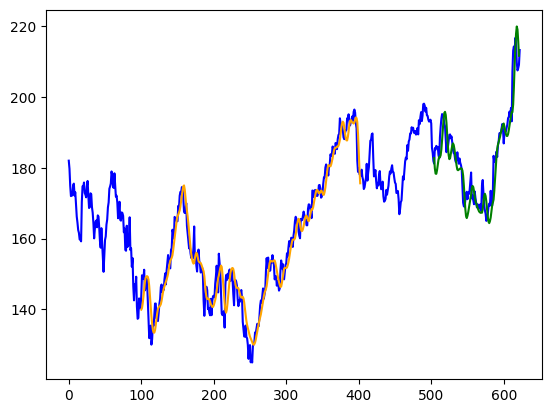

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), color = 'b')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'g')
plt.show()

In [ ]:
len(test_data)

219

In [ ]:
x_input = test_data[119:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.6637206764866339,
 0.6836879432624117,
 0.7013638843426078,
 0.7025641025641027,
 0.6906710310965631,
 0.6964539007092201,
 0.6779050736497547,
 0.6548827059465356,
 0.6451718494271685,
 0.642007637752319,
 0.6250954719039827,
 0.6169121658483363,
 0.6252045826513912,
 0.6475722858701585,
 0.6273867975995637,
 0.6125477359519913,
 0.6285870158210585,
 0.6153846153846154,
 0.608074195308238,
 0.5961811238406984,
 0.5464266230223678,
 0.49208947081287513,
 0.4811783960720133,
 0.47986906710310984,
 0.4987452264048009,
 0.5207855973813422,
 0.5260229132569558,
 0.5031096563011457,
 0.5235133660665576,
 0.51936715766503,
 0.5313693398799784,
 0.5571194762684126,
 0.5853791598472449,
 0.5057283142389526,
 0.5156573922531371,
 0.5000545553737044,
 0.48761593016912186,
 0.5268957992362249,
 0.5069285324604473,
 0.4911074740861976,
 0.47812329514457197,
 0.48696126568467,
 0.47790507364975454,
 0.4861974904528099,
 0.47386797599563546,
 0.4871794871794872,
 0.46655755591925807,
 0.545771958

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.89194524]
101
1 day input [0.68368794 0.70136388 0.7025641  0.69067103 0.6964539  0.67790507
 0.65488271 0.64517185 0.64200764 0.62509547 0.61691217 0.62520458
 0.64757229 0.6273868  0.61254774 0.62858702 0.61538462 0.6080742
 0.59618112 0.54642662 0.49208947 0.4811784  0.47986907 0.49874523
 0.5207856  0.52602291 0.50310966 0.52351337 0.51936716 0.53136934
 0.55711948 0.58537916 0.50572831 0.51565739 0.50005456 0.48761593
 0.5268958  0.50692853 0.49110747 0.4781233  0.48696127 0.47790507
 0.48619749 0.47386798 0.48717949 0.46655756 0.54577196 0.56224768
 0.52013093 0.48401528 0.46895799 0.45848336 0.43622477 0.44539007
 0.45695581 0.48008729 0.48957992 0.48314239 0.5289689  0.4943808
 0.48314239 0.5238407  0.63677032 0.61854883 0.62607747 0.62978723
 0.6497545  0.63316967 0.66841244 0.68096017 0.70594654 0.70725586
 0.7075832  0.72034915 0.73464266 0.7188216  0.67495908 0.70878342
 0.70889253 0.71216585 0.72307692 0.73355155 0.75297327 0.75646481
 0.77304965 0.75788325 0.78417894 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
len(df1)

623

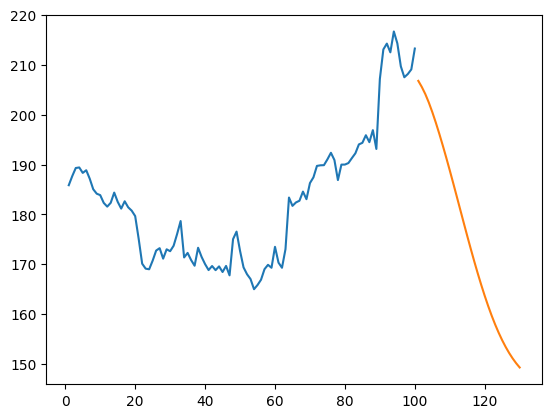

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[523:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

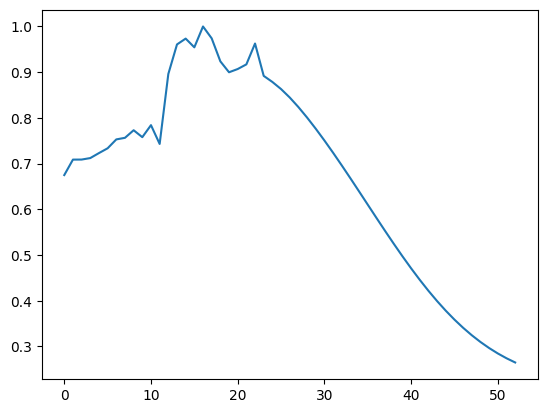

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[600:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

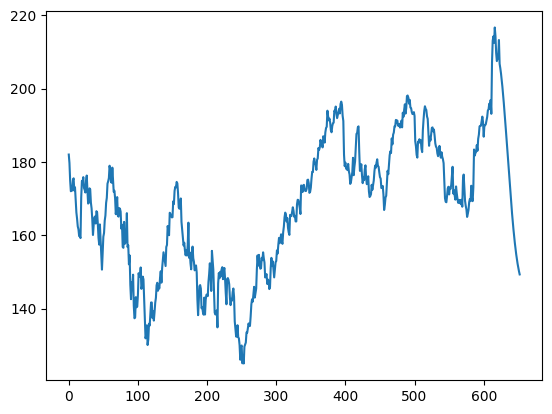

In [ ]:
plt.plot(df3)